In [25]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#Path to the image
img_path = 'vivaldi.jpg'

# Reading the image with opencv
img = cv2.imread(img_path)

# Reading csv file with pandas and giving names to each column
index=["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

# How many colors do we want
how_many = 10

#We define the resize factor for the image
resize_factor = 8

In [17]:
#resize the image with less pixels
def resize_img(img, factor):
    return cv2.resize(img, (int(len(img[0])/factor), int(len(img)/factor)))

In [18]:
x = resize_img(img, resize_factor)
len_x = len(x[0])
len_y = len(x)
len_img_x = len(img[0])
len_img_y = len(img)

In [19]:
len_x, len_y, len_img_x, len_img_y

(141, 79, 1131, 632)

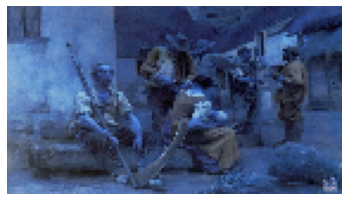

In [20]:
# We check if the image is too compressed
plt.imshow(x)
plt.axis('off');

In [7]:
# function to calculate minimum distance from all colors and get the most matching color
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [8]:
# get all colours
def get_colours(img):
    # List of colors
    colour_list = []
    
    for y in img:
        print('{:.1f}% completed.'.format(100*len(colour_list)/(len_x * len_y)), end='\r')
        for x in y:
            b,g,r = x
            b = int(b)
            g = int(g)
            r = int(r)
            colour = getColorName(r,g,b)
            colour_list.append(colour)
    print('100.0% completed.')
        
    #return colour_list
    return pd.DataFrame(colour_list, columns=['Color'])

In [9]:
df = get_colours(x)

100.0% completed.


In [22]:
# This gets the rgb code from the color that repeat the most in the image
def get_rgb(df, how_many=5):
    data = df.groupby(df.columns.tolist(),as_index=False, sort=True).size()
    data = data.sort_values(by= ["size"], ascending=False).reset_index(drop=True)

    r = []
    g = []
    b = []
    colors = []
    
    for i in range(how_many):
        color = data['Color'][i]
        colors.append(color)
        r.append( int(csv[csv['color_name']==color]['R']))
        g.append( int(csv[csv['color_name']==color]['G']))
        b.append( int(csv[csv['color_name']==color]['B']))
    
    return r, g, b, colors

In [23]:
r, g, b, colors = get_rgb(df, 10)

In [27]:
cv2.namedWindow('image')


while(1):
    cv2.imshow('image', img)

    #We define the length according to the ammount of colours
    longi = int(len_img_x/(how_many))

    #Create a background for the colours
    cv2.rectangle(img, (0, 0), (len_img_x, 60), (255, 255, 255), -1)
        
    # cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
    cv2.putText(img, 'Most important colours from the picture', (int(len_img_x/4), 20), 3, 0.8, (0,0,0), 1, cv2.LINE_AA)

    # draw each color with its name
    for i in range(how_many):
        # cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(img, (longi*i + 10, 35), (longi*(i+1)-5, 58), (b[i], g[i], r[i]), -1)
        #Text for each colour
        cv2.putText(img, colors[i], (longi*i + 15, 33), 1, 0.7, (0,0,0), 1, cv2.LINE_AA)
        
    
    # Break the loop when user hits 'esc' key    
    if cv2.waitKey(20) & 0xFF ==27:
        break

if not os.path.exists('results'):
    os.makedirs('results')
    
# Saves the image
cv2.imwrite('./results/result_'+img_path, img)

cv2.destroyAllWindows()